# XY Bending Modes from FEA

In [1]:
import numpy as np
import pandas as pd
import scipy.io
import os
from M1S_tools import *

import matplotlib.pyplot as plt

plt.jet()

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
Afz =  (27685, 170)
Afx =  (27685, 170)
Afy =  (27685, 170)
U matrix (27685, 170)
V matrix (170, 170)
S matrix (170, 170)
N node =  27685


<Figure size 640x480 with 0 Axes>

In [2]:
dataFolder = '/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents'

#read Fx Bending Modes & forces
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Ux-27-Jul-2023.csv', header=None)
UxMat = np.array(df)
print('Ux matrix', UxMat.shape)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Vx-27-Jul-2023.csv', header=None)
VxMat = np.array(df)
print('Vx matrix', VxMat.shape)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Sx-27-Jul-2023.csv', header=None)
SxMat = np.array(df)
print('Sx matrix', SxMat.shape)

#read Fy Bending Modes & forces
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Uy-27-Jul-2023.csv', header=None)
UyMat = np.array(df)
print('Uy matrix', UyMat.shape)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Vy-27-Jul-2023.csv', header=None)
VyMat = np.array(df)
print('Vy matrix', VyMat.shape)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Sy-27-Jul-2023.csv', header=None)
SyMat = np.array(df)
print('Sy matrix', SyMat.shape)

Ux matrix (27685, 170)
Vx matrix (170, 170)
Sx matrix (170, 170)
Uy matrix (27685, 170)
Vy matrix (170, 170)
Sy matrix (170, 170)


In [3]:
idx_triple = saz<0.03
Afx_triple = Afx[:, idx_triple]
Afy_triple = Afy[:, idx_triple]

### check the index does give me triple SAs only.

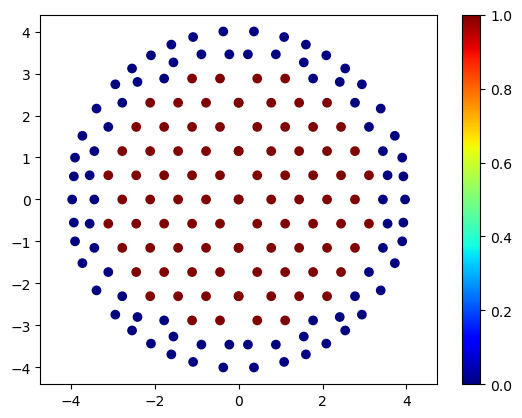

In [4]:
plt.scatter(sax, say, c=idx_triple)
plt.axis('equal')
plt.colorbar();

#### check I can reproduce the all-SA x bending modes from Trupti. Yes.

In [10]:
#svd take ~2 minutes
U, S, Vh = np.linalg.svd(Afx)
V = np.transpose(Vh)

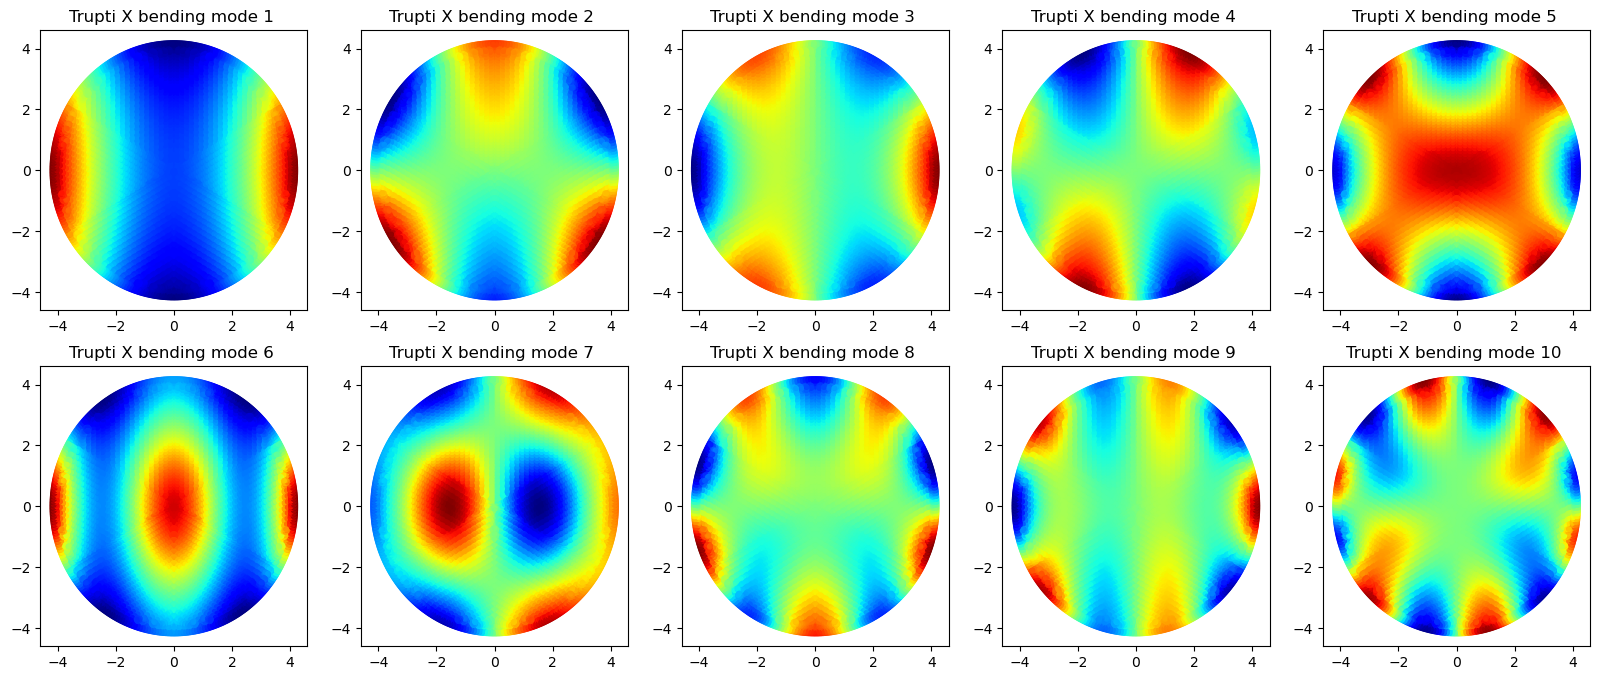

In [11]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, UxMat[:,modeID-1])
    ax[irow][icol].set_title('Trupti X bending mode %d '%modeID)

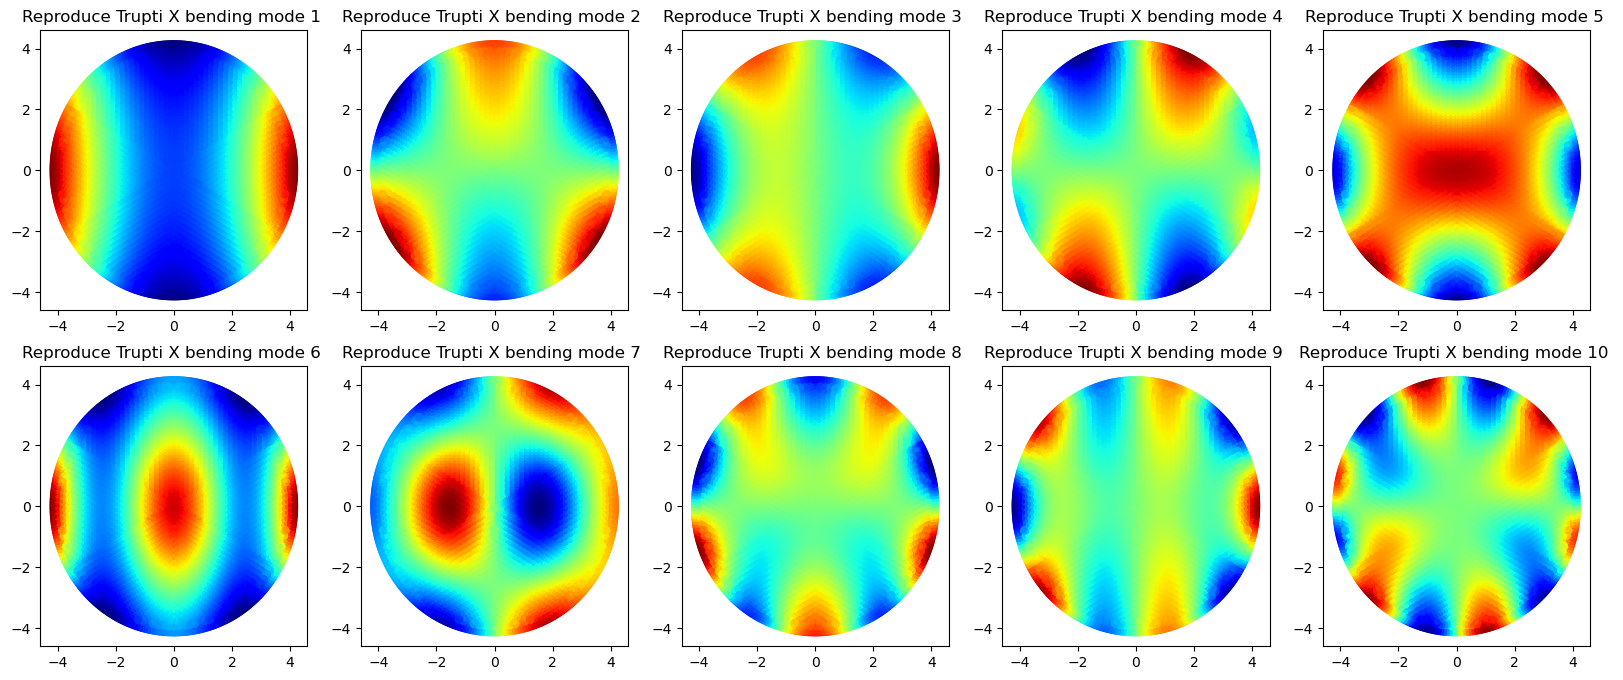

In [12]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, U[:,modeID-1])
    ax[irow][icol].set_title('Reproduce Trupti X bending mode %d '%modeID)

## SVD of influence matrix with Triple Actuators only

In [13]:
filename = 'XYBendingModes_GMT.npy'
if not os.path.exists(filename):
    #each SVD takes ~2 minutes
    Ux90, Sx90, Vhx90 = np.linalg.svd(Afx_triple)
    Vx90 = np.transpose(Vhx90)
    print(Vx90.shape)
    Uy90, Sy90, Vhy90 = np.linalg.svd(Afy_triple)
    Vy90 = np.transpose(Vhy90)
    print(Vy90.shape)
    Ux90 = Ux90[:,:len(Sx90)]
    Uy90 = Uy90[:,:len(Sy90)]
    with open(filename, 'wb') as f:
        np.save(f, Ux90)
        np.save(f, Sx90)
        np.save(f, Vx90)
        np.save(f, Uy90)
        np.save(f, Sy90)
        np.save(f, Vy90)
else:
    with open(filename, 'rb') as f:
        Ux90 = np.load(f)
        Sx90 = np.load(f)
        Vx90 = np.load(f)
        Uy90 = np.load(f)
        Sy90 = np.load(f)
        Vy90 = np.load(f)

In [14]:
############normalize bending modes to RMS = 1um ###################
Ux90 *= np.sqrt(Ux90.shape[0])
for modeID in range(1, Ux90.shape[1]+1):
    Vx90[:, modeID-1] *= 1e-6/Sx90[modeID-1]*np.sqrt(Ux90.shape[0]) #1e-6 due to meter to micron conversion
Uy90 *= np.sqrt(Uy90.shape[0])
for modeID in range(1, Uy90.shape[1]+1):
    Vy90[:, modeID-1] *= 1e-6/Sy90[modeID-1]*np.sqrt(Uy90.shape[0]) #1e-6 due to meter to micron conversion

In [15]:
print(UxMat.shape, Ux90.shape, Uy90.shape)

(27685, 170) (27685, 90) (27685, 90)


In [16]:
Afx_triple.shape

(27685, 90)

(-4.364811, 4.364811, -4.406176, 4.404714)

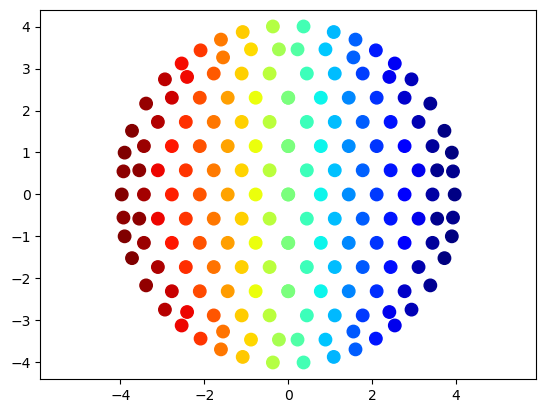

In [17]:
plt.scatter(sax, say, 80, V[:,0])
plt.axis('equal')

(-4.364811, 4.364811, -4.406176, 4.404714)

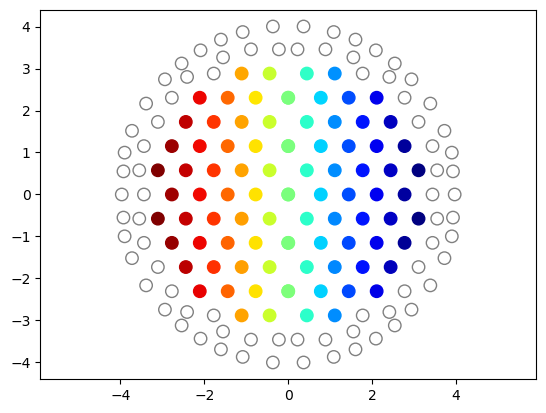

In [18]:
plt.scatter(sax[idx_triple], say[idx_triple], 80, Vx90[:,0])
plt.scatter(sax[~idx_triple], say[~idx_triple], 80, edgecolors='grey', facecolors='none')
plt.axis('equal')

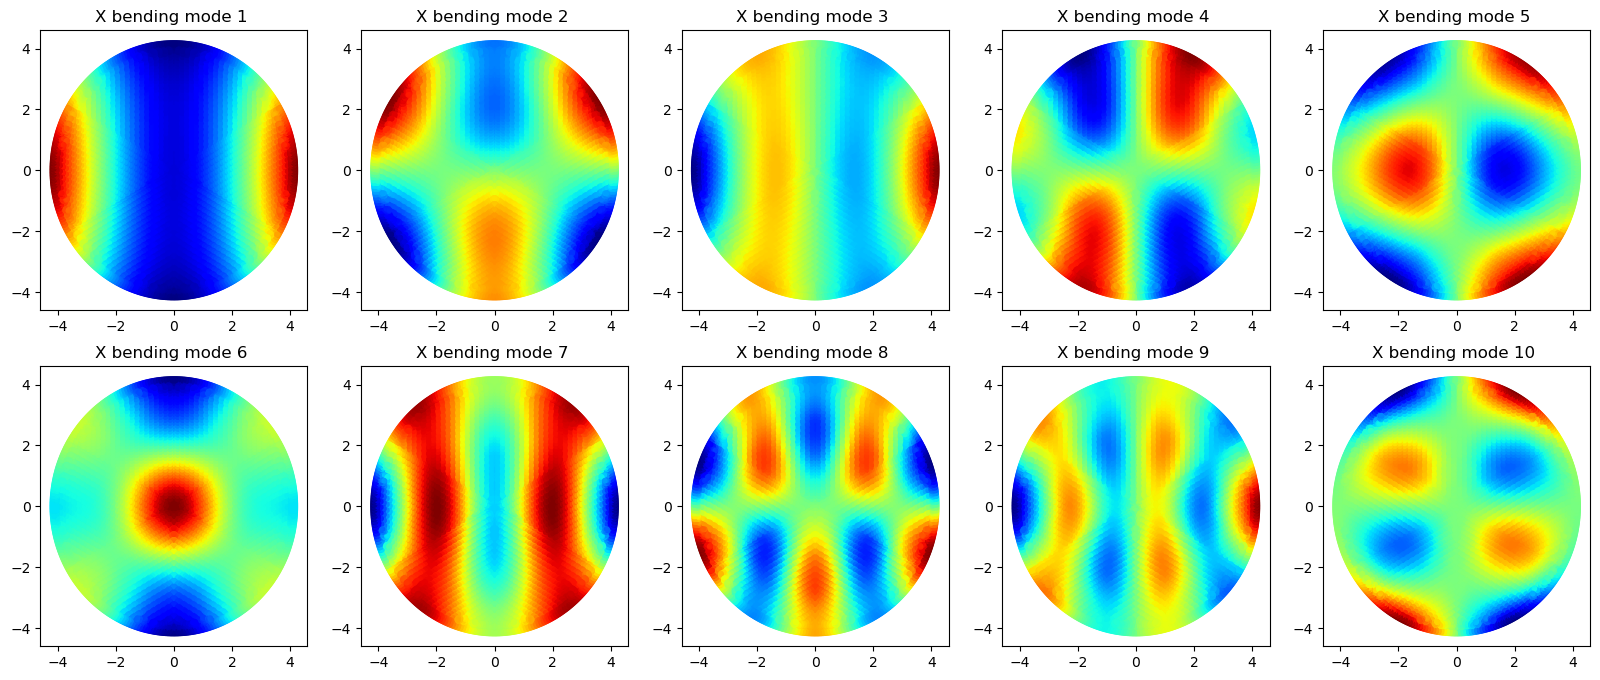

In [19]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, Ux90[:,modeID-1])
    ax[irow][icol].set_title('X bending mode %d '%modeID)

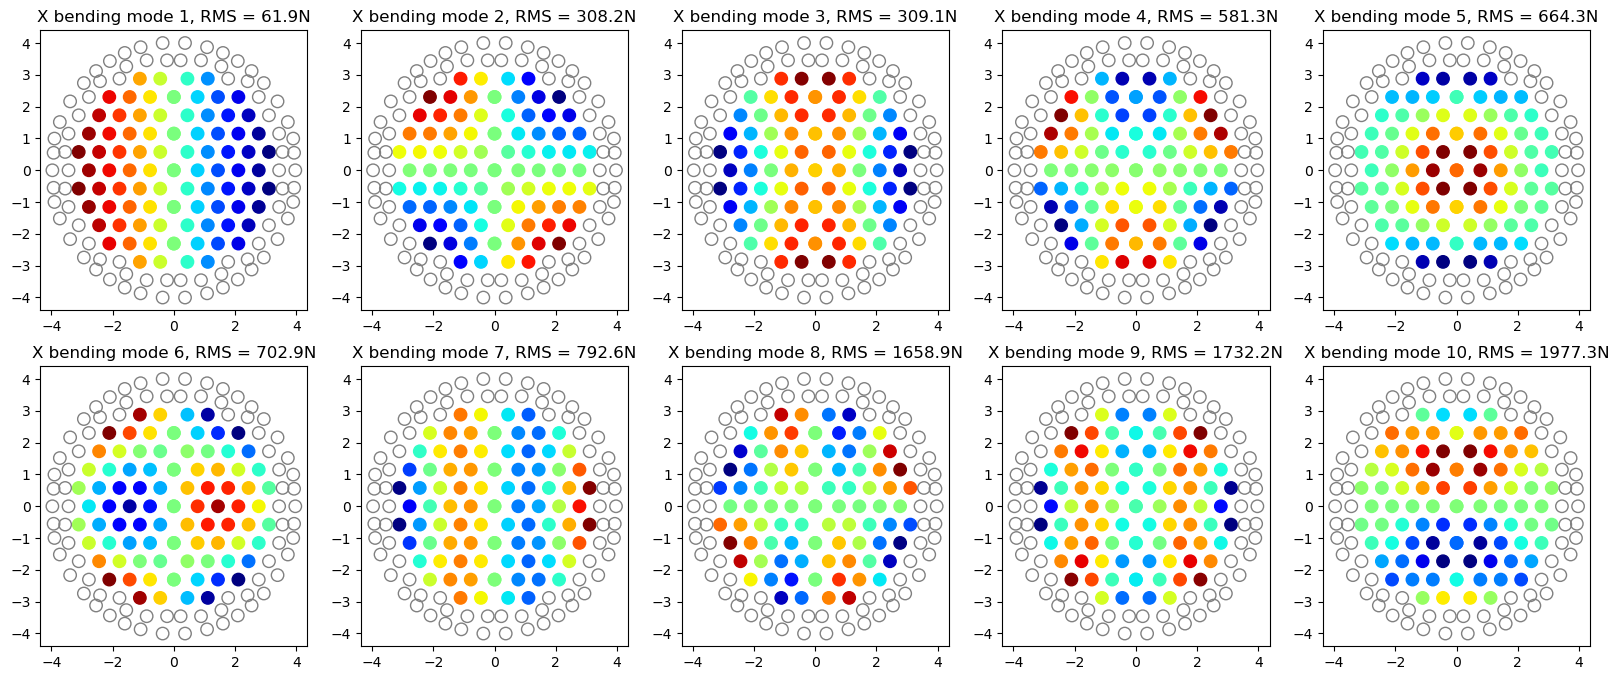

In [20]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(sax[idx_triple], say[idx_triple],80, Vx90[:,modeID-1])
    ax[irow][icol].set_title('X bending mode %d, RMS = %.1fN'%(modeID, np.std(Vx90[:,modeID-1])))
    ax[irow][icol].scatter(sax[~idx_triple], say[~idx_triple], 80, edgecolors='grey', facecolors='none')

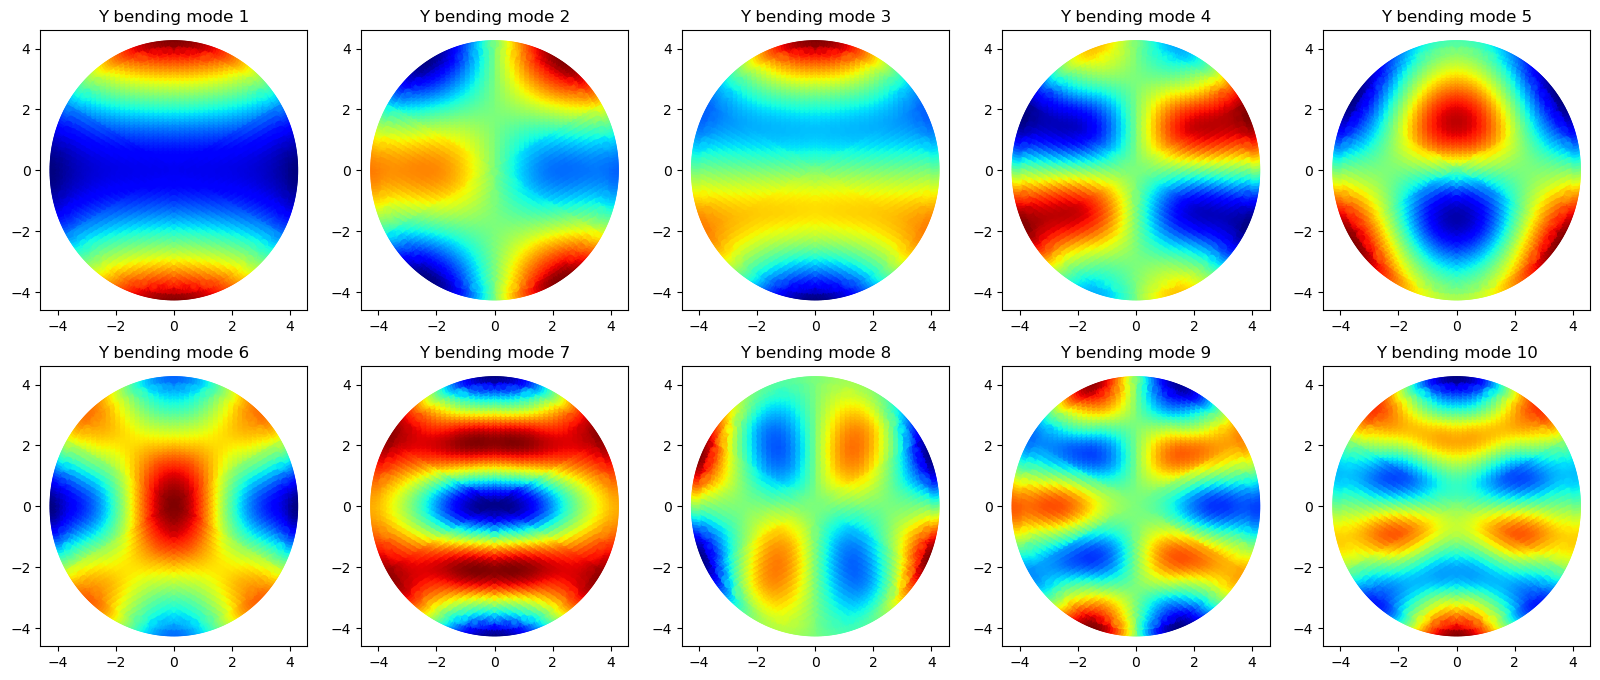

In [21]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, Uy90[:,modeID-1])
    ax[irow][icol].set_title('Y bending mode %d'%modeID)

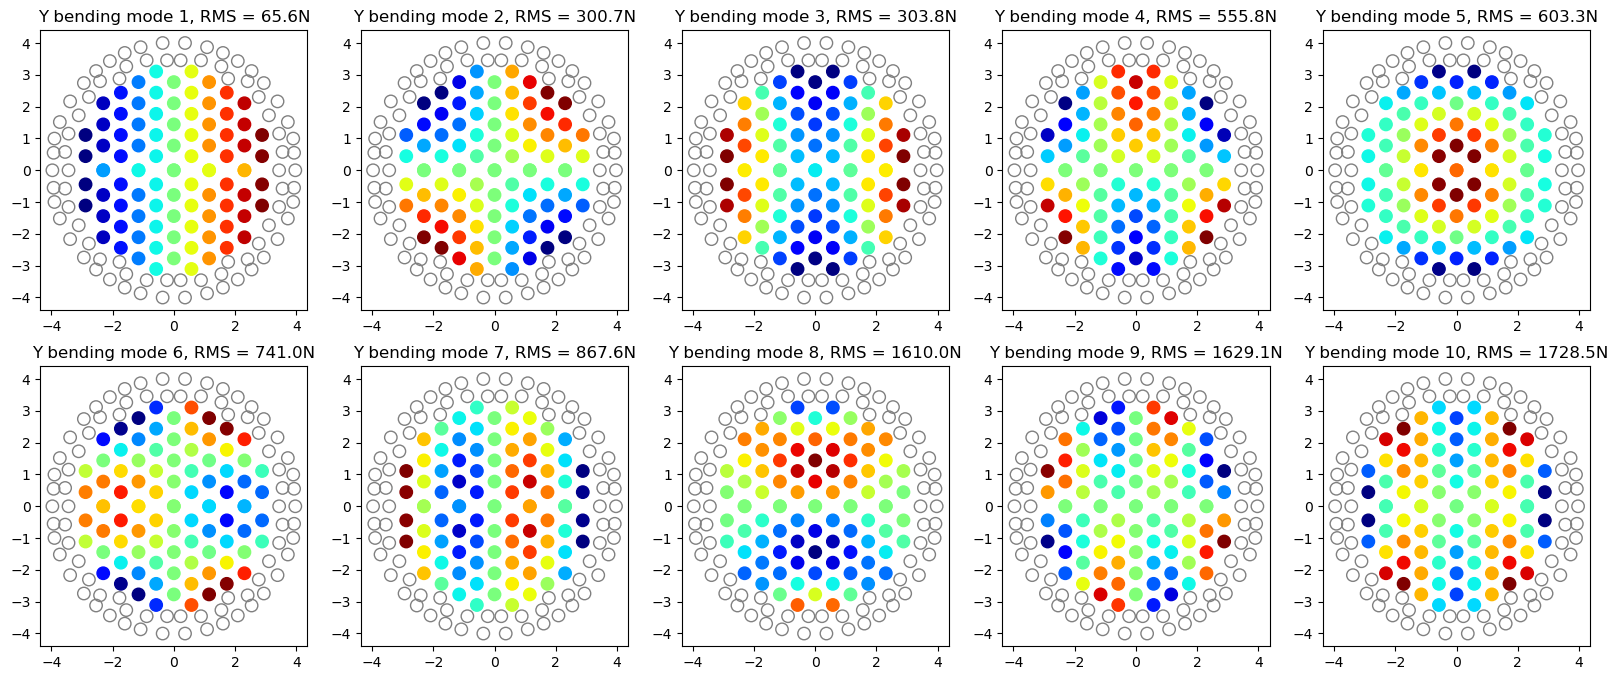

In [22]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(say[idx_triple], sax[idx_triple],80, Vy90[:,modeID-1])
    ax[irow][icol].set_title('Y bending mode %d, RMS = %.1fN'%(modeID, np.std(Vy90[:,modeID-1])))
    ax[irow][icol].scatter(sax[~idx_triple], say[~idx_triple], 80, edgecolors='grey', facecolors='none')

## Let's calculate the surface slopes of the bending modes

X modes first

In [23]:
#BM surf nodes (as in the GMT FEA) are not on a regular grid.
# this gives a approximate sense of grid size
np.sqrt(nodex.shape[0])

166.388100536066

In [24]:
pixSize = 50e-3 #50mm, so that 166 pixels cover 8.3m
vec = np.arange(np.min(nodex), np.max(nodex)+pixSize, pixSize)
xfit, yfit = np.meshgrid(vec, vec)
print(xfit.shape)
rfit = np.sqrt(xfit**2+yfit**2)
mask = np.ones_like(rfit)
mask[rfit>np.max(xfit)]=np.nan

(169, 169)


In [25]:
from scipy.interpolate import griddata

done


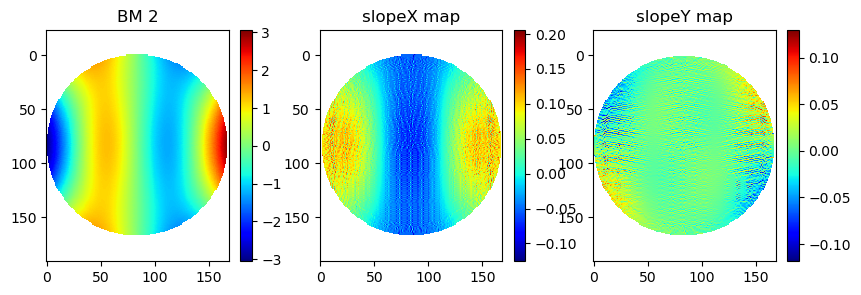

In [28]:
slopeMax = np.zeros(Ux90.shape[1])
slopeRms = np.zeros(Ux90.shape[1])
fig, ax = plt.subplots(1,3, figsize=(10,3))
for i in np.arange(10):
    #print(i, end = ' ')
    dd = griddata(np.vstack((nodex, nodey)).T, Ux90[:,i], (xfit, yfit), method='nearest')
    slopeX = dd*mask - np.roll(dd*mask,1,axis=1)
    slopeY = dd*mask - np.roll(dd*mask,1,axis=0)
    slope = np.sqrt(slopeX**2+slopeY**2)*2 # we want um per 100mm (each pixel is 50mm)

    slopeMax[i] = np.max(slope[~np.isnan(slope)]) #slope is the sqrt of X and Y so it is already positive
    slopeRms[i] = np.sqrt(np.mean((slope[~np.isnan(slope)]**2)))
    #print(slopeMax[i], slopeRms[i], np.std(slope[~np.isnan(slope)]))
    if i==2:
        img = ax[0].imshow(dd*mask)
        ax[0].axis('equal')
        ax[0].set_title('BM %d'%i)
        fig.colorbar(img, ax=ax[0]);

        img = ax[1].imshow(slopeX)
        ax[1].axis('equal')
        ax[1].set_title('slopeX map')
        fig.colorbar(img, ax=ax[1]);
        
        img = ax[2].imshow(slopeY)
        ax[2].axis('equal')
        ax[2].set_title('slopeY map')
        fig.colorbar(img, ax=ax[2]);
print('done')

In [27]:
def f90to170(fin):
    fout = np.zeros(nact)
    fout[idx_triple] = fin
    return fout

In [29]:
c = np.ones_like(slopeMax)
print('modeID,  S RMS(nm),  S MAX(nm), F/puck RMS(N), F/puck MAX(N), slope RMS (nm/100mm), slope MAX (nm/100mm)')
for i in np.arange(10):
    gmtF = f90to170(Vx90[:,i])
    if i<5:
        c[i] = 0.5 #make 500nm surf RMS
    else:
        c[i] = 80./np.std(gmtF/npuck) #scale force down to 100N

    #overwrite c[i] above
    c[i] = np.min([147./np.max(abs(gmtF/npuck)), 0.5])
    print('%3d, %10.0f, %12.0f,    %8.0f,    %8.0f,           %8.0f,           %8.0f'%(i+1, #c[i],
                                                   c[i]*1000*np.std(Ux90[:,i]), c[i]*1000*np.max(abs(Ux90[:,i])),
                                                    c[i]*np.std(gmtF/npuck), c[i]*np.max(abs(gmtF/npuck)), 
                                                    c[i]*1000*slopeRms[i], c[i]*1000*slopeMax[i]
                                                   ))

modeID,  S RMS(nm),  S MAX(nm), F/puck RMS(N), F/puck MAX(N), slope RMS (nm/100mm), slope MAX (nm/100mm)
  1,        500,         1343,           8,          17,                 47,                137
  2,        500,         1280,          37,         105,                 63,                174
  3,        500,         1529,          38,         102,                 67,                221
  4,        374,          797,          54,         147,                 44,                129
  5,        306,          739,          51,         147,                 43,                111
  6,        319,          914,          54,         147,                 38,                149
  7,        250,          763,          48,         147,                 43,                135
  8,        128,          327,          52,         147,                 25,                 72
  9,        113,          356,          49,         147,                 23,                 67
 10,        110,          349, 

### Do the same for Y modes

done


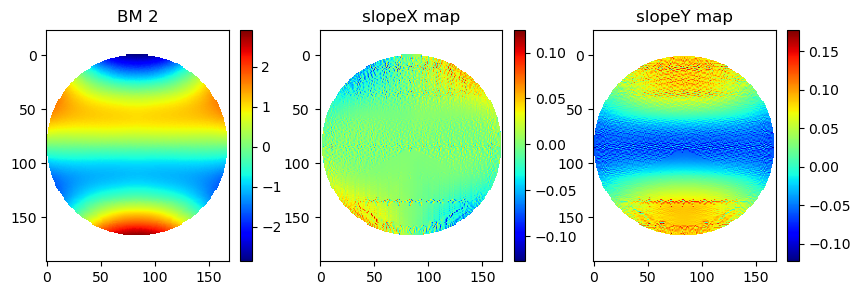

In [30]:
slopeMax = np.zeros(Uy90.shape[1])
slopeRms = np.zeros(Uy90.shape[1])
fig, ax = plt.subplots(1,3, figsize=(10,3))
for i in np.arange(10):
    #print(i, end = ' ')
    dd = griddata(np.vstack((nodex, nodey)).T, Uy90[:,i], (xfit, yfit), method='nearest')
    slopeX = dd*mask - np.roll(dd*mask,1,axis=1)
    slopeY = dd*mask - np.roll(dd*mask,1,axis=0)
    slope = np.sqrt(slopeX**2+slopeY**2)*2 # we want um per 100mm (each pixel is 50mm)

    slopeMax[i] = np.max(slope[~np.isnan(slope)])
    slopeRms[i] = np.sqrt(np.mean((slope[~np.isnan(slope)]**2)))
    #print(slopeMax[i], slopeRms[i], np.std(slope[~np.isnan(slope)]))
    if i==2:
        img = ax[0].imshow(dd*mask)
        ax[0].axis('equal')
        ax[0].set_title('BM %d'%i)
        fig.colorbar(img, ax=ax[0]);

        img = ax[1].imshow(slopeX)
        ax[1].axis('equal')
        ax[1].set_title('slopeX map')
        fig.colorbar(img, ax=ax[1]);
        
        img = ax[2].imshow(slopeY)
        ax[2].axis('equal')
        ax[2].set_title('slopeY map')
        fig.colorbar(img, ax=ax[2]);
print('done')

In [31]:
c = np.ones_like(slopeMax)
print('modeID,  S RMS(nm),  S MAX(nm), F/puck RMS(N), F/puck MAX(N), slope RMS (nm/100mm), slope MAX (nm/100mm)')
for i in np.arange(10):
    gmtF = f90to170(Vy90[:,i])
    if i<5:
        c[i] = 0.5 #make 500nm surf RMS
    else:
        c[i] = 80./np.std(gmtF/npuck) #scale force down to 100N

    #overwrite c[i] above
    c[i] = np.min([147./np.max(abs(gmtF/npuck)), 0.5])
    print('%3d, %10.0f, %12.0f,    %8.0f,    %8.0f,           %8.0f,           %8.0f'%(i+1, #c[i],
                                                   c[i]*1000*np.std(Uy90[:,i]), c[i]*1000*np.max(abs(Uy90[:,i])),
                                                    c[i]*np.std(gmtF/npuck), c[i]*np.max(abs(gmtF/npuck)), 
                                                    c[i]*1000*slopeRms[i], c[i]*1000*slopeMax[i]
                                                   ))

modeID,  S RMS(nm),  S MAX(nm), F/puck RMS(N), F/puck MAX(N), slope RMS (nm/100mm), slope MAX (nm/100mm)
  1,        500,         1332,           8,          18,                 46,                144
  2,        500,         1302,          36,          96,                 62,                176
  3,        500,         1453,          37,          98,                 62,                203
  4,        397,          784,          53,         147,                 47,                153
  5,        347,          768,          53,         147,                 49,                146
  6,        289,          792,          54,         147,                 36,                109
  7,        258,          623,          56,         147,                 42,                141
  8,        134,          403,          52,         147,                 24,                 88
  9,        125,          331,          50,         147,                 24,                 75
 10,        115,          325, 